<a href="https://colab.research.google.com/github/ngotrithu/Behavior-Scoring-Default-of-Credit-Card-Clients/blob/main/Behavior_Scoring_Default_of_Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

* Mục đích: Dự báo xác suất vỡ nợ của KH hay dự báo liệu KH có mất khả năng thanh toán trong kỳ hạn sắp tới hay không?
* Bộ dữ liệu này chứa thông tin về các khoản thanh toán mặc định, các yếu tố nhân khẩu học, dữ liệu tín dụng, lịch sử thanh toán và bảng sao kê hóa đơn của các khách hàng sử dụng thẻ tín dụng ở Đài Loan từ tháng 4 năm 2005 đến tháng 9 năm 2005

Có tất cả 25 features:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Giới tính (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Tình trạng hôn nhân (1=married, 2=single, 3=others)
* AGE: Tuổi
* PAY_0: Tình trạng thanh toán tháng 9, 2005 (-1=thanh toán hợp lệ, 1=thanh toán chậm 1 tháng, 2=thanh toán chậm 2 tháng, ... 8=thanh toán chậm 8 tháng, 9=thanh toán chậm 1 tháng)
* PAY_2: Tình trạng thanh toán tháng 8, 2005 (thông tin như trên)
* PAY_3: Tình trạng thanh toán tháng 7, 2005 (thông tin như trên)
* PAY_4: Tình trạng thanh toán tháng 6 , 2005 (thông tin như trên)
* PAY_5: Tình trạng thanh toán tháng 5, 2005 (thông tin như trên)
* PAY_6: Tình trạng thanh toán tháng 4, 2005 (thông tin như trên)
* BILL_AMT1: Hoá đơn tháng 9, 2005 (NT dollar)
* BILL_AMT2: Hoá đơn tháng 8, 2005 (NT dollar)
* BILL_AMT3: Hoá đơn sao kê hoá đơn tháng 7, 2005 (NT dollar)
* BILL_AMT4: Hoá đơn sao kê hoá đơn tháng 6, 2005 (NT dollar)
* BILL_AMT5: Hoá đơn sao kê hoá đơn tháng 5, 2005 (NT dollar)
* BILL_AMT6: Hoá đơn sao kê hoá đơn tháng 4, 2005 (NT dollar)
* PAY_AMT1: Số tiền thanh toán trước đó vào tháng 9, 2005 (NT dollar)
* PAY_AMT2: Số tiền thanh toán trước đó vào tháng 8, 2005 (NT dollar)
* PAY_AMT3: Số tiền thanh toán trước đó vào tháng 7, 2005 (NT dollar)
* PAY_AMT4: Số tiền thanh toán trước đó vào tháng 6, 2005 (NT dollar)
* PAY_AMT5: Số tiền thanh toán trước đó vào tháng 5, 2005 (NT dollar)
* PAY_AMT6: Số tiền thanh toán trước đó vào tháng 4, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no) (Biến mục tiêu)

##Loading dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/thomasXwang/UCI-Credit-card-defaults/master/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df = df.drop(['ID'], axis=1)
df = df.rename(columns={'default.payment.next.month': 'def_pay'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##EDA

In [ ]:
df.shape

(30000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

Bộ dữ liệu này không có missing values và không có biến categorical nhưng thực tế có ba biến categorical đã được biến đổi `SEX`, `EDUCATION`, `MARRIAGE`
* SEX: Giới tính (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Tình trạng hôn nhân (1=married, 2=single, 3=others)

In [ ]:
df['def_pay'].value_counts()/len(df)

0    0.7788
1    0.2212
Name: def_pay, dtype: float64

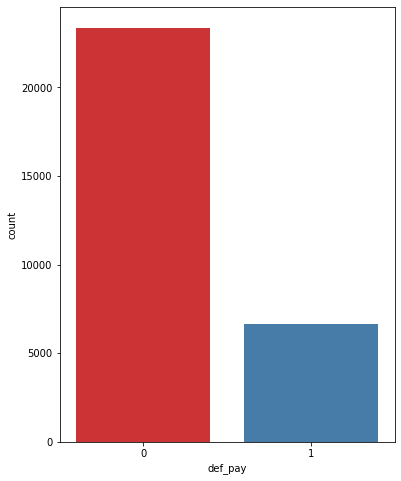

In [ ]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='def_pay', data=df, palette='Set1')
plt.show()

##Data Cleaning

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Theo như mô tả của dữ liệu biến `EDUCATION` chỉ có các giá trị từ 1,2,3,4,5,6 nhưng đây xuất hiện cả 0 nữa => Chúng ta sẽ gộp chung những giá trị 0,5,6 thành 4 (others)

In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

* MARRIAGE: Tình trạng hôn nhân (1=married, 2=single, 3=others) => Gộp những giá trị bằng 0 thành 3

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

Theo mô tả của bộ dữ liệu giá trị của `PAY_n` nếu có giá trị -1 = thanh toán hợp lệ, 1 = thanh toán chậm 1 tháng, 2 = thanh toán chậm 2 tháng, ... 8 = thanh toán chậm 8 tháng, 9 = thanh toán chậm 1 tháng. Vậy những giá trị 0, -2 khả năng cao cũng là những thanh toán hợp lệ nên chúng ta sẽ gom lại thành 0 để thể hiện những thanh toán hợp lệ của KH

In [ ]:
fil = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[fil, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
df['PAY_0'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


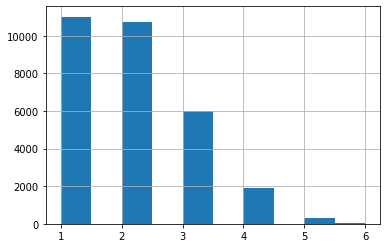

In [ ]:
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])
df.AgeBin.hist()

In [ ]:
df['LIMIT_BAL_mean'] = df['LIMIT_BAL'] - df['LIMIT_BAL'].mean()
df['LIMIT_BAL_std'] = df['LIMIT_BAL_mean'] / df['LIMIT_BAL'].std()

In [ ]:
df['LIMIT_BAL'] = np.log(df['LIMIT_BAL'])

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AgeBin,LIMIT_BAL_mean,LIMIT_BAL_std
0,9.903488,2,2,1,24,2,2,0,0,0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1,-147484.322667,-1.136701
1,11.695247,2,2,2,26,0,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,-47484.322667,-0.365974
2,11.407565,2,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,2,-77484.322667,-0.597192
3,10.819778,2,2,1,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2,-117484.322667,-0.905483
4,10.819778,1,2,1,57,0,0,0,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,4,-117484.322667,-0.905483


##Spliting the Data

In [ ]:
X = df.drop(['def_pay'], axis=1)
y = df['def_pay']

In [ ]:
# split X and y into training and testing sets
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#normalize
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

##Baseline

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    #print("Precision  = {}".format(precision))
    #print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, f1, coh_kap, time_taken

Accuracy = 0.8191666666666667
ROC Area under Curve = 0.6554331943504295
F1 Score  = 0.4673539518900344
Cohen's Kappa = 0.3681108552925326
Time taken = 8.621309280395508
              precision    recall  f1-score   support

           0    0.84392   0.94387   0.89110      4703
           1    0.64324   0.36700   0.46735      1297

    accuracy                        0.81917      6000
   macro avg    0.74358   0.65543   0.67923      6000
weighted avg    0.80054   0.81917   0.79950      6000



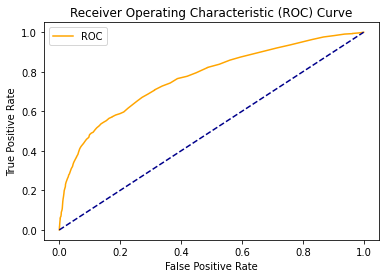

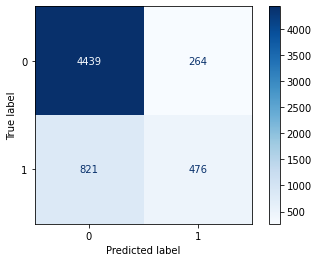

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_baseline = RandomForestClassifier()
rf_baseline, accuracy_rf, roc_auc_rf, f1_score_rf,coh_kap_rf, tt_rf = run_model(rf_baseline, X_train, y_train, X_test, y_test)

##Feature Selection

###RFE

Vì bộ dữ liệu này có giá trị âm nên không áp dụng được SelectKbest. Nên chúng ta sẽ áp dụng những kỹ thuật FS khác

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
from sklearn.feature_selection import RFE
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#selected_feat= X_train.columns[rfe.support_]
#print(selected_feat)

print('Chosen best 10 feature by rfe:', X_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'LIMIT_BAL_mean'],
      dtype='object')


Ở trên, chúng ta vừa sử dụng kỹ thuật RFE để chọn ra 10 features tốt nhất. Nhưng kỹ thuật này không giúp cho chúng ta biết được chính xác nên giữ lại bao nhiêu feature là tối ưu cho mô hình nên chúng ta sẽ sử dụng RFECV (RFE Cross Validation)

###RFECV

In [ ]:
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL_mean'],
      dtype='object')


In [ ]:
select_ft = X_train.columns[rfecv.support_]

Như vậy chúng ta đã tìm ra được 16 features tốt nhất cho bài toán phân loại này

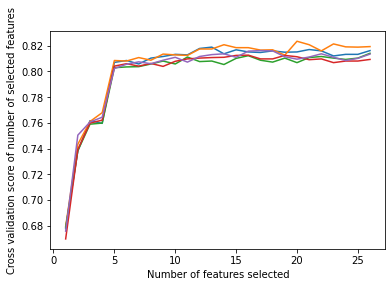

In [ ]:
# Plot number of features vs cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

###RF Importance

Feature ranking:
1. feature 5 (0.099815)
2. feature 11 (0.059240)
3. feature 4 (0.058840)
4. feature 12 (0.052514)
5. feature 13 (0.050607)
6. feature 17 (0.048714)
7. feature 15 (0.048685)
8. feature 14 (0.048568)
9. feature 16 (0.047981)
10. feature 18 (0.045814)
11. feature 22 (0.045348)
12. feature 19 (0.045238)
13. feature 21 (0.042630)
14. feature 20 (0.041973)
15. feature 6 (0.037222)
16. feature 24 (0.033097)
17. feature 0 (0.032733)
18. feature 25 (0.032572)
19. feature 7 (0.020189)
20. feature 2 (0.019187)
21. feature 8 (0.018856)
22. feature 23 (0.017726)
23. feature 9 (0.016297)
24. feature 3 (0.012944)
25. feature 1 (0.011688)
26. feature 10 (0.011524)


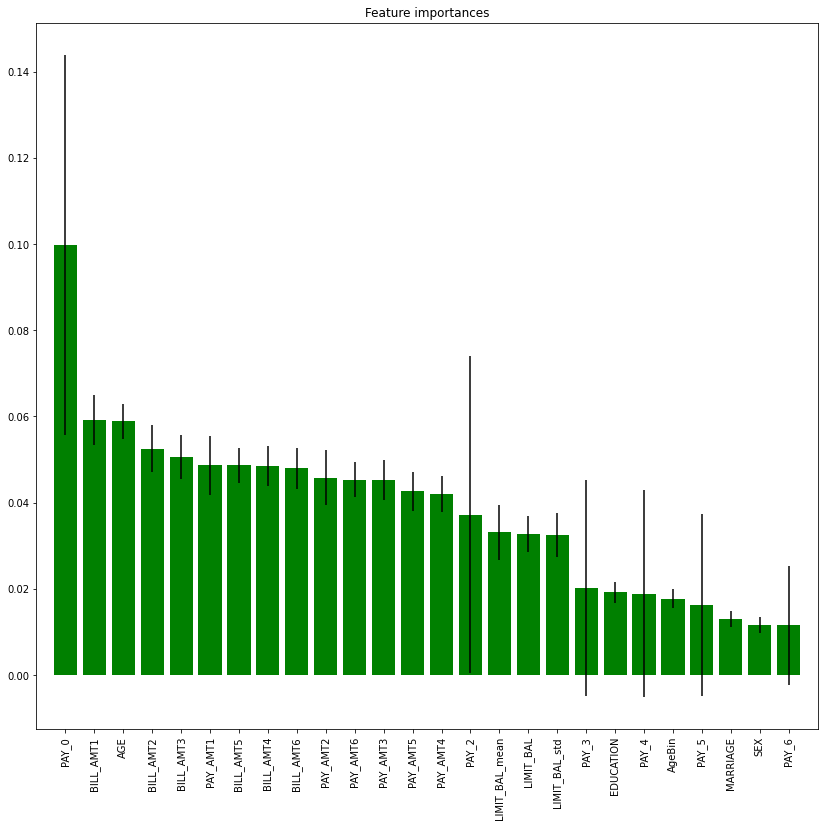

In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Có thể nhận thấy phương pháp RF Feature Importance này cũng cho thấy 17 feature là những feature tốt nhất cho mô hình

###Feature Extraction with PCA

Chúng ta sẽ sử dụng principle component analysis (PCA) để FS. Trước khi PCA, chúng ta cần chuẩn hóa dữ liệu để PCA có hiệu suất tốt hơn.

Text(0, 0.5, 'explained_variance_ratio_')

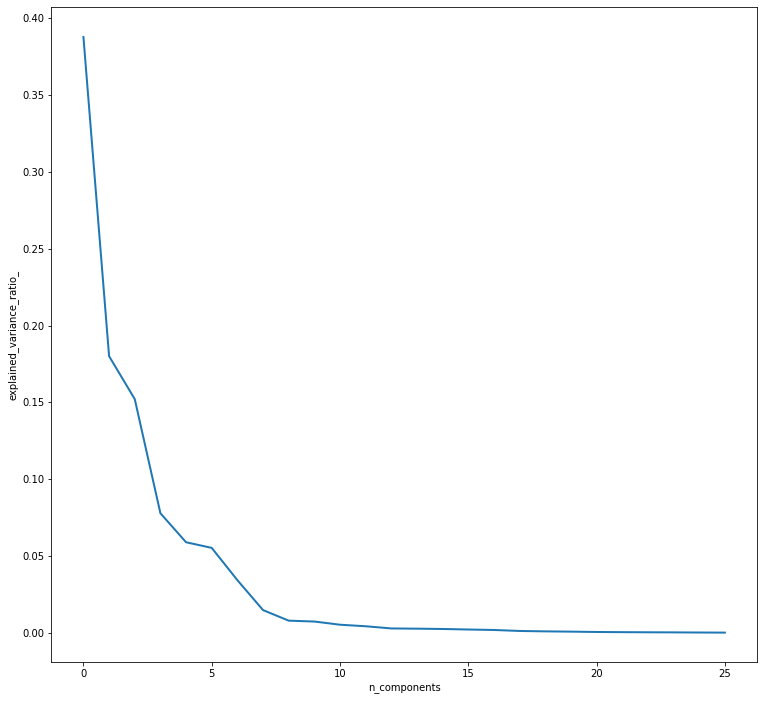

In [ ]:
#normalization
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_N)

plt.figure(1, figsize=(10, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Dựa vào biểu đồ trên chúng ta sẽ chọn số n_components = 4

#Spliting the Data after FS

In [ ]:
X=X[select_ft]
X.head()

,AGE,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL_mean
0,24,2,2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,-147484.322667
1,26,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,-47484.322667
2,34,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-77484.322667
3,37,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-117484.322667
4,57,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-117484.322667


In [ ]:
# split X and y into training and testing sets
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#normalize
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 18661, 1: 5339})
Resampled dataset shape Counter({0: 18661, 1: 18661})


#Modeling

##Logistic Regression

Accuracy = 0.7875
ROC Area under Curve = 0.6938631995751986
F1 Score  = 0.5183226293917642
Cohen's Kappa = 0.38207284270724784
Time taken = 0.46817564964294434
              precision    recall  f1-score   support

           0    0.86860   0.85881   0.86368      4703
           1    0.50815   0.52891   0.51832      1297

    accuracy                        0.78750      6000
   macro avg    0.68838   0.69386   0.69100      6000
weighted avg    0.79068   0.78750   0.78903      6000



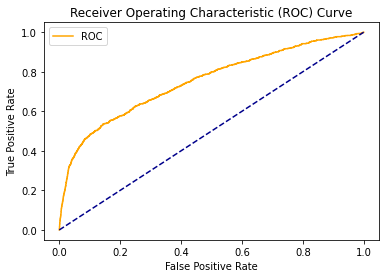

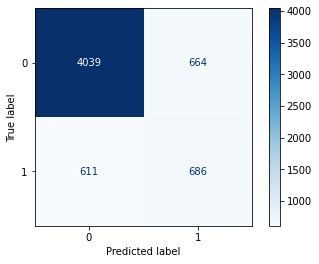

In [ ]:
# Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lrsmt = LogisticRegression(**params_lr)
model_lrsmt, accuracy_lrsmt, roc_auc_lrsmt,f1_score_lrsmt,coh_kap_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train_smote, y_train_smote, X_test, y_test)

##Decision Tree

Accuracy = 0.7023333333333334
ROC Area under Curve = 0.6322772370397608
F1 Score  = 0.4249839021249195
Cohen's Kappa = 0.23146732509749735
Time taken = 0.22556138038635254
              precision    recall  f1-score   support

           0    0.84801   0.75569   0.79919      4703
           1    0.36484   0.50887   0.42498      1297

    accuracy                        0.70233      6000
   macro avg    0.60643   0.63228   0.61209      6000
weighted avg    0.74356   0.70233   0.71830      6000



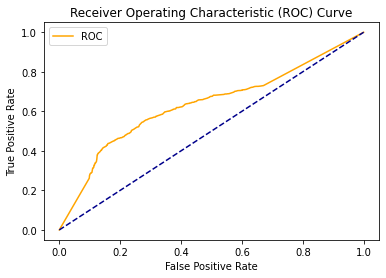

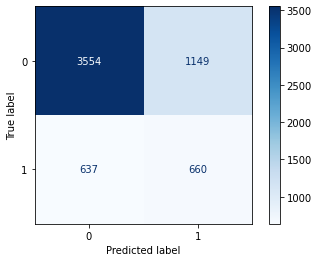

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dtsmt = DecisionTreeClassifier(**params_dt)
model_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt,coh_kap_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train_smote, y_train_smote, X_test, y_test)

##Random Forest

Accuracy = 0.7943333333333333
ROC Area under Curve = 0.6951510305844905
F1 Score  = 0.5224458204334366
Cohen's Kappa = 0.391394795882988
Time taken = 13.171151399612427
              precision    recall  f1-score   support

           0    0.86802   0.86987   0.86895      4703
           1    0.52448   0.52043   0.52245      1297

    accuracy                        0.79433      6000
   macro avg    0.69625   0.69515   0.69570      6000
weighted avg    0.79376   0.79433   0.79404      6000



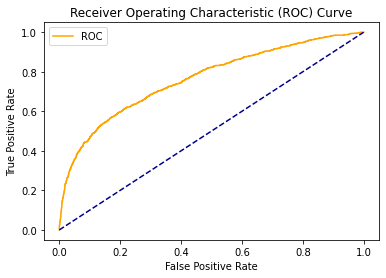

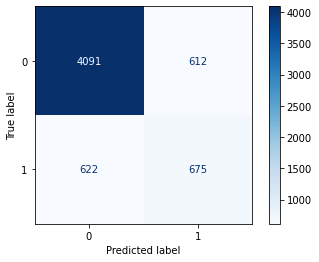

In [ ]:
# Random Forest with SMOTE
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rfsmt = RandomForestClassifier(**params_rf)
model_rfsmt, accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt,coh_kap_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train_smote, y_train_smote, X_test, y_test)

##AdaBoost

Accuracy = 0.8073333333333333
ROC Area under Curve = 0.6671489236270555
F1 Score  = 0.48530721282279604
Cohen's Kappa = 0.3702728472655623
Time taken = 7.410293817520142
              precision    recall  f1-score   support

           0    0.85112   0.91410   0.88148      4703
           1    0.57429   0.42020   0.48531      1297

    accuracy                        0.80733      6000
   macro avg    0.71270   0.66715   0.68340      6000
weighted avg    0.79128   0.80733   0.79584      6000



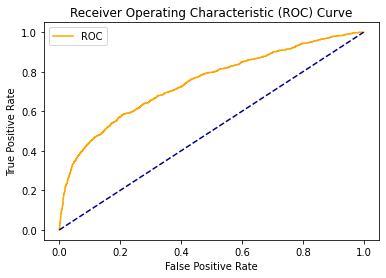

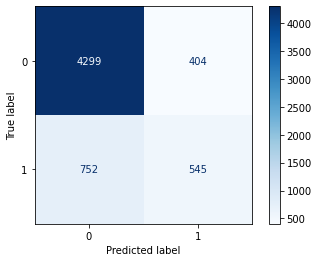

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
model_adasmote = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                  n_estimators=50,
                                  algorithm="SAMME.R",
                                  learning_rate=0.5)
model_adasmt, accuracy_adasmt, roc_auc_adasmt, f1_score_adasmt,coh_kap_adasmt, tt_adasmt = run_model(model_adasmote, X_train_smote, y_train_smote, X_test, y_test)

##CatBoost

Learning rate set to 0.5
0:	learn: 0.6085700	total: 72.6ms	remaining: 1.38s
1:	learn: 0.5777818	total: 92.4ms	remaining: 831ms
2:	learn: 0.5600275	total: 113ms	remaining: 639ms
3:	learn: 0.5499149	total: 132ms	remaining: 530ms
4:	learn: 0.5413993	total: 155ms	remaining: 464ms
5:	learn: 0.5334537	total: 185ms	remaining: 431ms
6:	learn: 0.5264505	total: 208ms	remaining: 387ms
7:	learn: 0.5157957	total: 229ms	remaining: 344ms
8:	learn: 0.5068982	total: 249ms	remaining: 305ms
9:	learn: 0.4998234	total: 269ms	remaining: 269ms
10:	learn: 0.4967984	total: 288ms	remaining: 236ms
11:	learn: 0.4909472	total: 318ms	remaining: 212ms
12:	learn: 0.4867876	total: 339ms	remaining: 183ms
13:	learn: 0.4769624	total: 359ms	remaining: 154ms
14:	learn: 0.4680997	total: 380ms	remaining: 127ms
15:	learn: 0.4622421	total: 400ms	remaining: 100ms
16:	learn: 0.4575881	total: 426ms	remaining: 75.1ms
17:	learn: 0.4537710	total: 447ms	remaining: 49.6ms
18:	learn: 0.4514263	total: 466ms	remaining: 24.5ms
19:	learn: 

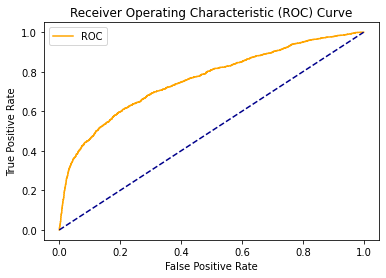

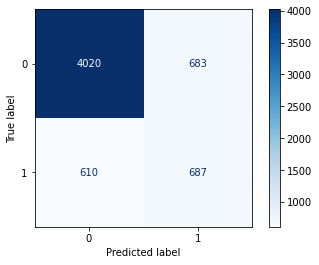

In [ ]:
#!pip install catboost
# Catboost
import catboost as cb
params_cb ={'iterations': 20,
            'max_depth': 8}

model_cbsmt = cb.CatBoostClassifier(**params_cb)
model_cbsmt, accuracy_cbsmt, roc_auc_cbsmt, f1_score_cbsmt,coh_kap_cbsmt, tt_cbsmt = run_model(model_cbsmt, X_train_smote, y_train_smote, X_test, y_test)

##LightGBM

Accuracy = 0.7768333333333334
ROC Area under Curve = 0.6887341713839048
F1 Score  = 0.5082629452809402
Cohen's Kappa = 0.364346232394511
Time taken = 4.674314737319946
              precision    recall  f1-score   support

           0    0.86773   0.84393   0.85566      4703
           1    0.48527   0.53354   0.50826      1297

    accuracy                        0.77683      6000
   macro avg    0.67650   0.68873   0.68196      6000
weighted avg    0.78506   0.77683   0.78057      6000



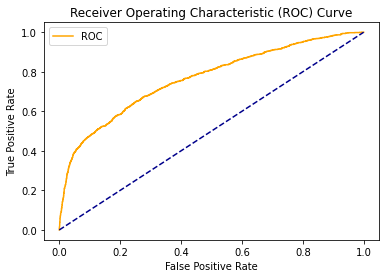

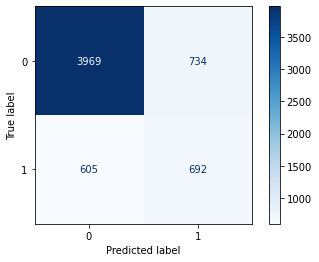

In [ ]:
# Light GBM with SMOTE
import lightgbm as lgb
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # Nên đặt nhỏ hơn 2^(max_depth)
          'max_depth': 4,  # -1 là không giới hạn
          'min_child_samples': 100,  # Số lượng mẫu tối thiểu trong một lá
          'max_bin': 100,  # Khoảng phân chia
          'subsample': 0.9,  # Lấy 90% quan sát trong tập train.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
         }
model_lgbsmt = lgb.LGBMClassifier(**params)
model_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt,coh_kap_lgbsmt, tt_lgbsmt = run_model(model_lgbsmt, X_train_smote, y_train_smote, X_test, y_test)

##XGB

Accuracy = 0.815
ROC Area under Curve = 0.6734353685232822
F1 Score  = 0.49773755656108604
Cohen's Kappa = 0.38852397215562195
Time taken = 116.11386156082153
              precision    recall  f1-score   support

           0    0.85316   0.92282   0.88662      4703
           1    0.60241   0.42406   0.49774      1297

    accuracy                        0.81500      6000
   macro avg    0.72778   0.67344   0.69218      6000
weighted avg    0.79895   0.81500   0.80256      6000



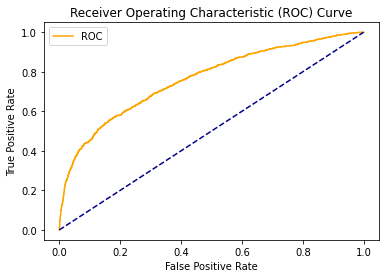

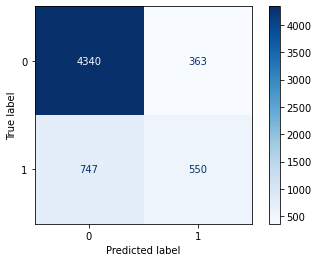

In [ ]:
# XGBoost with Booster Dart
import xgboost as xgb
params_xgb ={
    'booster': 'dart',
    'objective':'binary:logistic',
    'eta':0.1,
    'silent':True,
    'max_depth':8,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric':'auc',
    'random_state': 42,
    'n_estimators': 200
    }

model_xgbdart = xgb.XGBClassifier(**params_xgb)
model_xgbdart, accuracy_xgbdart, roc_auc_xgbdart, f1_score_xgbdart,coh_kap_xgbdart, tt_xgbdart = run_model(model_xgbdart, X_train_smote, y_train_smote, X_test, y_test)

Accuracy = 0.8148333333333333
ROC Area under Curve = 0.6708163443632741
F1 Score  = 0.49338805289557697
Cohen's Kappa = 0.38470206509715543
Time taken = 19.574193477630615
              precision    recall  f1-score   support

           0    0.85188   0.92452   0.88671      4703
           1    0.60379   0.41712   0.49339      1297

    accuracy                        0.81483      6000
   macro avg    0.72784   0.67082   0.69005      6000
weighted avg    0.79825   0.81483   0.80169      6000



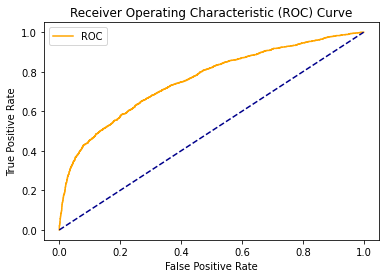

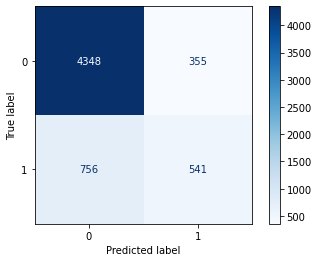

In [ ]:
# XGBoost with Booster Dart
import xgboost as xgb
params_xgb ={
    'booster': 'gbtree',
    'objective':'binary:logistic',
    'eta':0.1,
    'silent':True,
    'max_depth':8,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric':'auc',
    'random_state': 42,
    'n_estimators': 200
    }

model_xgbgbtree = xgb.XGBClassifier(**params_xgb)
model_xgbgbtree, accuracy_gbtree, roc_auc_gbtree, f1_score_gbtree,coh_kap_gbtree, tt_gbtree = run_model(model_xgbgbtree, X_train_smote, y_train_smote, X_test, y_test)

##Voting Classifier

In [ ]:
df_pred = pd.DataFrame(data = np.c_[accuracy_lrsmt, accuracy_dtsmt,accuracy_rfsmt,accuracy_adasmt,accuracy_lgbsmt, accuracy_xgbdart,accuracy_gbtree ],
                       columns = ['logistic', 'tree', 'forest','ada','lgbm','dart', 'gbtree'])

In [ ]:
df_pred.head()

,logistic,tree,forest,ada,lgbm,dart,gbtree
0,0.7875,0.702333,0.794333,0.807333,0.776833,0.815,0.814833


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
t0=time.time()
vote = VotingClassifier(estimators=[('log', model_lrsmt),
                                    ('tree', model_dtsmt),
                                    ('rf', model_rfsmt),
                                    ('lgbm', model_lgbsmt),
                                    ('dart', model_xgbdart),
                                    ], voting = 'hard')

vote.fit(X_train_smote,y_train_smote)
y_pred = vote.predict(X_test)
accuracy_vote = accuracy_score(y_test, y_pred)
roc_auc_vote = roc_auc_score(y_test, y_pred)
f1_vote = f1_score(y_test, y_pred)
coh_kap_vote = cohen_kappa_score(y_test, y_pred)
tt_vote = time.time()-t0
print("Accuracy = {}".format(accuracy_vote))
print("ROC Area under Curve = {}".format(roc_auc_vote))
print("F1 Score  = {}".format(f1_vote))
print("Cohen's Kappa = {}".format(coh_kap_vote))
print("Time taken = {}".format(tt_vote))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.8006666666666666
ROC Area under Curve = 0.6969574859204192
F1 Score  = 0.5272727272727273
Cohen's Kappa = 0.4010815585700672
Time taken = 101.43371367454529
[[4137  566]
 [ 630  667]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4703
           1       0.54      0.51      0.53      1297

    accuracy                           0.80      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.80      0.80      0.80      6000



##Stacking Classifier

In [ ]:
base_models = []
base_models.append(('log', LogisticRegression()))
base_models.append(('tree', DecisionTreeClassifier()))
base_models.append(('ada', AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=50,algorithm="SAMME.R",learning_rate=0.5)))
base_models.append(('lgbm', lgb.LGBMClassifier()))
base_models.append(('xgb', xgb.XGBClassifier()))

Trong bài toán hồi quy chọn `meta_model` là linear regression, còn trong bài toán phân loại chúng ta sẽ chọn `meta_model` là logistic regression

Accuracy = 0.8116666666666666
ROC Area under Curve = 0.6827558517988568
F1 Score  = 0.5112456747404844
Cohen's Kappa = 0.3967483132531193
Time taken = 67.04237866401672
              precision    recall  f1-score   support

           0    0.85838   0.90984   0.88336      4703
           1    0.58227   0.45567   0.51125      1297

    accuracy                        0.81167      6000
   macro avg    0.72032   0.68276   0.69730      6000
weighted avg    0.79869   0.81167   0.80292      6000



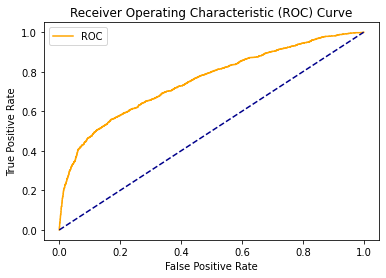

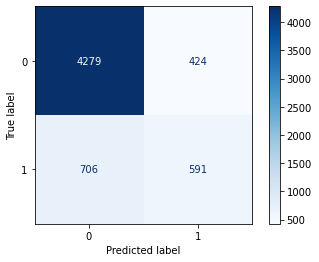

In [ ]:
meta_model = LogisticRegression()
from sklearn.ensemble import StackingClassifier
import time
t0=time.time()
stk = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stk, accuracy_stk, roc_auc_stk, f1_score_stk,coh_kap_stk, tt_stk = run_model(stk, X_train_smote, y_train_smote, X_test, y_test)

#Model Selection

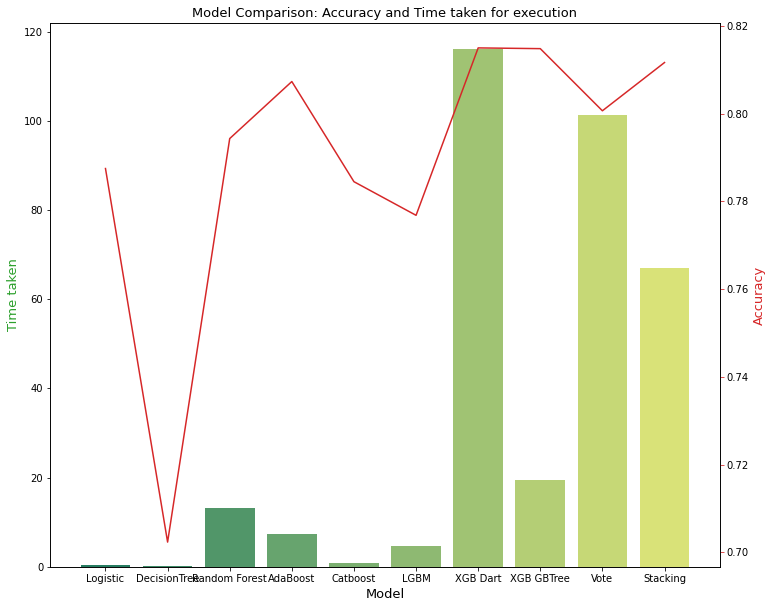

In [ ]:
accuracy_scores = [accuracy_lrsmt, accuracy_dtsmt, accuracy_rfsmt, accuracy_adasmt, accuracy_cbsmt,
                   accuracy_lgbsmt, accuracy_xgbdart, accuracy_gbtree, accuracy_vote, accuracy_stk]
roc_auc_scores = [roc_auc_lrsmt, roc_auc_dtsmt, roc_auc_rfsmt, roc_auc_adasmt, roc_auc_cbsmt,
                   roc_auc_lgbsmt, roc_auc_xgbdart, roc_auc_gbtree, roc_auc_vote, roc_auc_stk]
coh_kap_scores = [coh_kap_lrsmt, coh_kap_dtsmt,coh_kap_rfsmt, coh_kap_adasmt, coh_kap_cbsmt,
                  coh_kap_lgbsmt, coh_kap_xgbdart, coh_kap_gbtree, coh_kap_vote, coh_kap_stk]
tt = [tt_lrsmt, tt_dtsmt, tt_rfsmt, tt_adasmt, tt_cbsmt, tt_lgbsmt, tt_xgbdart, tt_gbtree, tt_vote, tt_stk]

model_data = {'Model': ['Logistic','DecisionTree','Random Forest','AdaBoost','Catboost',
                        'LGBM', 'XGB Dart', 'XGB GBTree', 'Vote', 'Stacking'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              #'F1 Score': f1_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

* Với bài toán Behavior Scoring, chúng ta nên chú trọng vào việc giảm số lượng sai lầm loại II (FN) mà mô hình phán đoán được. Những khách hàng thuộc sai lầm loại II về thực tế họ đã chưa thanh toán nhưng mô hình dự đoán những khách hàng này đã thanh toán theo đúng kỳ hạn. Xét theo góc độ tín dụng, nếu KH trả lãi không đủ và đúng hạn thì điểm tín dụng của KH sẽ thấp, nhảy nhóm nợ trên hệ thống tin tín dụng quốc gia CIC, điều này sẽ gây khó khăn cho các khoản vay tiếp theo của KH vì để có một CIC đẹp là người đã từng vay và trả lãi đúng hạn nên sai lầm loại II (FN) có tính chất nghiêm trọng hơn.
* Do đó,  ngoài việc lựa chọn mô hình tốt, chúng ta cũng cần lựa chọn những mô hình có các TH thuộc sai lầm loại II là thấp nhất.
* Dựa vào đồ thị trên kết hợp với confusion matrix của các mô hình đã huấn luyện ở trên thì hiệu suất của mô hình XGB với `booster = gbtree` cho độ chính xác tốt nhất 81.5%  và không cần không quá nhiều thời gian để huấn luyện mô hình (mất 31.8s) và có số lượng sai lầm loại II thấp nhất (355), nên chúng ta sẽ chọn mô hình này làm mô hình cuối cùng để áp dụng vào bài toán này!

#GridSearchCV

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
def grid_search(params, random=False): 
    
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1, random_state=2)
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)

    # Extract best params
    best_params = grid.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = grid.best_score_

    # Print best score
    print("Best score: {:.5f}".format(best_score))

In [ ]:
# Tìm n_estimators phù hợp cho bài toán bằng cách sử dụng early_stop
model = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, n_estimators=5000)
eval_set = [(X_test, y_test)]
eval_metric="error" # 'error' cho bài toán phân loại, 'rmse' cho bài toán hồi quy
model.fit(X_train_smote, y_train_smote, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=100)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.251667
Will train until validation_0-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.251667
[2]	validation_0-error:0.242333
[3]	validation_0-error:0.251667
[4]	validation_0-error:0.2415
[5]	validation_0-error:0.239
[6]	validation_0-error:0.239167
[7]	validation_0-error:0.240667
[8]	validation_0-error:0.2405
[9]	validation_0-error:0.241667
[10]	validation_0-error:0.234333
[11]	validation_0-error:0.233833
[12]	validation_0-error:0.233833
[13]	validation_0-error:0.234
[14]	validation_0-error:0.234667
[15]	validation_0-error:0.240167
[16]	validation_0-error:0.236167
[17]	validation_0-error:0.236167
[18]	validation_0-error:0.236
[19]	validation_0-error:0.234167
[20]	validation_0-error:0.233167
[21]	validation_0-error:0.231833
[22]	validation_0-error:0.231833
[23]	validation_0-error:0.232833
[24]	validation_0-error:0.230667
[25]	validation_0-error:0.23
[26]	validation_0-error:0.229167
[27]	validation_0-error:0.228
[28]	validation_0-error:0.228333
[29]	v

Sau 672 lượt huấn luyện mô hình đã dừng lại và độ chính xác đã cải thiện từ 81.5% lên 81.92%

In [ ]:
grid_search(params={'n_estimators':[300, 500, 672,800]})

Best params: {'n_estimators': 300}
Best score: 0.81957


In [ ]:
grid_search(params={'n_estimators':[2, 25, 50, 75, 100,300]})

Best params: {'n_estimators': 75}
Best score: 0.82027


Giảm max_depth làm cho phương sai giảm => Hạn chế overffiting

In [ ]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8], 
                    'n_estimators':[75]})

Best params: {'max_depth': 4, 'n_estimators': 75}
Best score: 0.82153


In [ ]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[3,4,5,6], 
                    'n_estimators':[75]})

Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 75}
Best score: 0.82153


In [ ]:
# Vì điểm số không cải thiện nên chúng ta sẽ grid_search thêm cho siêu tham số
# 'min_child_weight': Tổng trọng số cần thiết để chia thành các notes
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate': [0.1], 
                    'max_depth':[4], 
                    'n_estimators':[75]})

Best params: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 75}
Best score: 0.82153


In [ ]:
# Điểm số không cải thiện thêm siêu tham số 'subsample'
# % tỷ lệ các quan sát đưa vào huấn luyện mô hình
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate': [0.1], 
                    'max_depth':[4], 
                    'n_estimators':[75]})

Best params: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 75, 'subsample': 0.5}
Best score: 0.82190


In [ ]:
#min_child_weight = 1 là giá trị mặc định của mô hình => Chúng ta có thể bỏ qua
grid_search(params={'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'learning_rate': [0.1],
                    'subsample': [0.5],
                    'max_depth':[4],
                    'n_estimators':[75]})

Best params: {'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 75, 'subsample': 0.5}
Best score: 0.82190


In [ ]:
# Mô hình vẫn không cải thiện thêm độ chính xác
grid_search(params={'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'max_depth':[4], 
                    'n_estimators':[75]})

Best params: {'colsample_bylevel': 0.8, 'colsample_bynode': 0.8, 'colsample_bytree': 0.7, 'max_depth': 4, 'n_estimators': 75}
Best score: 0.82197


In [ ]:
grid_search(params={'gamma':[0, 0.01, 0.05, 0.1, 0.5, 1, 2, 3], 
                    'colsample_bylevel':[0.8], 
                    'colsample_bytree':[0.7], 
                    'colsample_bynode':[0.8], 
                    'max_depth':[4], 
                    'n_estimators':[75]})

Best params: {'colsample_bylevel': 0.8, 'colsample_bynode': 0.8, 'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 4, 'n_estimators': 75}
Best score: 0.82197


Vì điểm tốt nhất của chúng ta sau khi tiến hành GridSearchCV đã giúp cho mô hình cải thiện độ chính xác từ từ 81.5% lên 82.197% (tăng gần 7 điểm phần trăm). Cải thiện tương đối tốt nên chúng ta sẽ dừng việc GridSearch tại đây!